# Step 1, we first import the necessary libraries to complete the capstone project

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import bs4
import requests
import os

In [2]:
df = pd.read_excel("Brussels Communes geolocation.xlsx") 
df

,Postal Code,Commune,Longitude,Latitude,Column1,Column2
0,1000,Bruxelles,4.351697,50.846557,NaN,NaN
1,1020,Laeken,4.348713,50.883392,NaN,NaN
2,1030,Schaerbeek,4.373712,50.867604,NaN,NaN
3,1040,Etterbeek,4.389510,50.836851,NaN,NaN
4,1050,Ixelles,4.381571,50.822285,NaN,NaN
5,1060,Saint-Gilles,4.345668,50.826741,NaN,NaN
6,1070,Anderlecht,4.312340,50.838141,NaN,NaN
7,1080,Molenbeek-Saint-Jean,4.322778,50.854355,NaN,NaN
8,1081,Koekelberg,4.325708,50.862263,NaN,NaN
9,1082,Berchem-Sainte-Agathe,4.292702,50.863984,NaN,NaN


In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [4]:
address = 'Brussels, Belgium'

geolocator = Nominatim(user_agent="BX_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brussels are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brussels are 50.8436709, 4.3674366933879565.


In [5]:
# create map of New York using latitude and longitude values
map_belgium = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Commune, postalcode in zip(df['Latitude'], df['Longitude'], df['Commune'], df['Postal Code']):
    label = '{}, {}'.format(Commune, postalcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_belgium)  
    
map_belgium

In [6]:
CLIENT_ID = 'H5BMPHNG0GM0JRSQQJJHPWSAONQUL51VVFK24PAFGBUBJ541' # your Foursquare ID
CLIENT_SECRET = 'BBDEK0KJIMZBNUCQFA2MUWTUZK2X0JDWPDE5DGQQL3KIXQHF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: H5BMPHNG0GM0JRSQQJJHPWSAONQUL51VVFK24PAFGBUBJ541
CLIENT_SECRET:BBDEK0KJIMZBNUCQFA2MUWTUZK2X0JDWPDE5DGQQL3KIXQHF


In [7]:
df.loc[0,"Commune"]

'Bruxelles'

In [8]:
neighbourhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighbourhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighbourhood_name = df.loc[0, 'Commune'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Bruxelles are 50.8465573, 4.351697.


In [9]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=H5BMPHNG0GM0JRSQQJJHPWSAONQUL51VVFK24PAFGBUBJ541&client_secret=BBDEK0KJIMZBNUCQFA2MUWTUZK2X0JDWPDE5DGQQL3KIXQHF&v=20180605&ll=50.8465573,4.351697&radius=500&limit=100'

In [10]:
import urllib
from urllib.request import urlopen
json_url = urlopen(url)

data = json.loads(json_url.read())

data

{'meta': {'code': 200, 'requestId': '5fe47e7db1fef738c4e6a00a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bruxelles-Ville',
  'headerFullLocation': 'Bruxelles-Ville, Brussels',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 136,
  'suggestedBounds': {'ne': {'lat': 50.8510573045, 'lng': 4.358810726335542},
   'sw': {'lat': 50.8420572955, 'lng': 4.344583273664457}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ade0d9cf964a520866c21e3',
       'name': 'AB Ancienne Belgique',
       'location': {'address': 'Boulevard Anspachlaan 110',
        'crossStreet': 'Steenstraat 23 Rue des Pierres',
        'lat': 50.84714272606074,
        'lng': 4.349484790531909,

In [11]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
venues = data['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\mathijsm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,AB Ancienne Belgique,Concert Hall,50.847143,4.349485
1,Grand Place / Grote Markt (Grote Markt),Plaza,50.846776,4.352481
2,Aux Merveilleux de Fred,Dessert Shop,50.848117,4.352141
3,The Grasshopper,Toy / Game Store,50.847595,4.352700
4,Le Comptoir de Mathilde,Chocolate Shop,50.847637,4.351368


In [13]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
    
        json_url = urlopen(url)

        results = json.loads(json_url.read())["response"]['groups'][0]['items']


        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Communes', 
                  'Commune Latitude', 
                  'Commune Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
# type your answer here
brussels_venues = getNearbyVenues(names=df['Commune'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Bruxelles
Laeken
Schaerbeek
Etterbeek
Ixelles
Saint-Gilles
Anderlecht
Molenbeek-Saint-Jean
Koekelberg
Berchem-Sainte-Agathe
Ganshoren
Jette
Neder-Over-Heembeek
Haren
Evere
Woluwe-Saint-Pierre
Auderghem
Watermael-Boitsfort
Uccle
Forest
Woluwe-Saint-Lambert
Saint-Josse-Ten-Noode


In [16]:
print(brussels_venues.shape)
brussels_venues.head()

(669, 7)


,Communes,Commune Latitude,Commune Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bruxelles,50.846557,4.351697,AB Ancienne Belgique,50.847143,4.349485,Concert Hall
1,Bruxelles,50.846557,4.351697,Grand Place / Grote Markt (Grote Markt),50.846776,4.352481,Plaza
2,Bruxelles,50.846557,4.351697,Aux Merveilleux de Fred,50.848117,4.352141,Dessert Shop
3,Bruxelles,50.846557,4.351697,The Grasshopper,50.847595,4.352700,Toy / Game Store
4,Bruxelles,50.846557,4.351697,Le Comptoir de Mathilde,50.847637,4.351368,Chocolate Shop


In [17]:
brussels_venues.groupby('Communes').count()

,Commune Latitude,Commune Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Communes,,,,,,
Anderlecht,18,18,18,18,18,18
Auderghem,34,34,34,34,34,34
Berchem-Sainte-Agathe,15,15,15,15,15,15
Bruxelles,100,100,100,100,100,100
Etterbeek,47,47,47,47,47,47
Evere,27,27,27,27,27,27
Forest,15,15,15,15,15,15
Ganshoren,25,25,25,25,25,25
Haren,9,9,9,9,9,9


In [18]:
print('There are {} uniques categories.'.format(len(brussels_venues['Venue Category'].unique())))

There are 184 uniques categories.


In [19]:
# one hot encoding
brussels_onehot = pd.get_dummies(brussels_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brussels_onehot['Communes'] = brussels_venues['Communes'] 

# move neighborhood column to the first column
fixed_columns = [brussels_onehot.columns[-1]] + list(brussels_onehot.columns[:-1])
brussels_onehot = brussels_onehot[fixed_columns]

brussels_onehot.head()

,Communes,African Restaurant,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Bath House,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cultural Center,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Eastern European Restaurant,Electronics Store,Escape Room,Event Service,Exhibit,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Friterie,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,Gay Bar,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Latin American Restaurant,Lebanese Restaurant,Lounge,Martial Arts School,Mediterranean Restaurant,Men's Store,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,Moving Target,Museum,Music Venue,Newsstand,Nightclub,Noodle House,Notary,Opera House,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Plaza,Pool,Portuguese Restaurant,Post Office,Print Shop,Pub,Record Shop,Resort,Restaurant,Rooftop Bar,Rugby Pitch,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shopping Mall,Skating Rink,Snack Place,Soccer Field,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Winery
0,Bruxelles,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bruxelles,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bruxelles,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bruxelles,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [20]:
brussels_onehot.shape

(669, 185)

In [21]:
brussels_grouped = brussels_onehot.groupby('Communes').mean().reset_index()
brussels_grouped

,Communes,African Restaurant,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Bath House,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cultural Center,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Eastern European Restaurant,Electronics Store,Escape Room,Event Service,Exhibit,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Friterie,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,Gay Bar,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Latin American Restaurant,Lebanese Restaurant,Lounge,Martial Arts School,Mediterranean Restaurant,Men's Store,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,Moving Target,Museum,Music Venue,Newsstand,Nightclub,Noodle House,Notary,Opera House,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Plaza,Pool,Portuguese Restaurant,Post Office,Print Shop,Pub,Record Shop,Resort,Restaurant,Rooftop Bar,Rugby Pitch,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shopping Mall,Skating Rink,Snack Place,Soccer Field,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Winery
0,Anderlecht,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.055556,0.055556,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.055556,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.111111,0.055556,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.055556,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.0000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.055556,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.055556,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000,0.00,0.00,0.000000,0.055556,0.00,0.000000,0.000000,0.000000,0.055556,0.00,0.000000,0.055556,0.00,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000

In [22]:
brussels_grouped.shape

(22, 185)

In [23]:
num_top_venues = 5

for hood in brussels_grouped['Communes']:
    print("----"+hood+"----")
    temp = brussels_grouped[brussels_grouped['Communes'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Anderlecht----
                venue  freq
0    Greek Restaurant  0.11
1      Discount Store  0.06
2  Belgian Restaurant  0.06
3         Snack Place  0.06
4  Seafood Restaurant  0.06


----Auderghem----
                       venue  freq
0         Italian Restaurant  0.09
1          French Restaurant  0.09
2  Middle Eastern Restaurant  0.06
3         Belgian Restaurant  0.06
4           Sushi Restaurant  0.06


----Berchem-Sainte-Agathe----
                    venue  freq
0            Tram Station  0.13
1        Greek Restaurant  0.13
2  Furniture / Home Store  0.07
3              Restaurant  0.07
4       French Restaurant  0.07


----Bruxelles----
            venue  freq
0        Beer Bar  0.07
1             Bar  0.05
2  Chocolate Shop  0.05
3           Hotel  0.04
4     Coffee Shop  0.04


----Etterbeek----
                venue  freq
0  Italian Restaurant  0.06
1   French Restaurant  0.04
2               Plaza  0.04
3         Pizza Place  0.04
4                 Bar  0.04


----E

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Communes']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Communes'] = brussels_grouped['Communes']

for ind in np.arange(brussels_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brussels_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Communes,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anderlecht,Greek Restaurant,Plaza,Bar,Middle Eastern Restaurant,Seafood Restaurant,Sandwich Place,Boutique,Restaurant,Belgian Restaurant,Snack Place
1,Auderghem,French Restaurant,Italian Restaurant,Sushi Restaurant,Middle Eastern Restaurant,Belgian Restaurant,Cocktail Bar,Plaza,Castle,Salad Place,Restaurant
2,Berchem-Sainte-Agathe,Greek Restaurant,Tram Station,Pharmacy,Burger Joint,Supermarket,French Restaurant,Restaurant,Notary,Bar,Furniture / Home Store
3,Bruxelles,Beer Bar,Bar,Chocolate Shop,Coffee Shop,Hotel,Plaza,Bookstore,Italian Restaurant,Belgian Restaurant,Sandwich Place
4,Etterbeek,Italian Restaurant,Greek Restaurant,Lounge,Plaza,Pizza Place,Bar,French Restaurant,Concert Hall,Diner,Soccer Field


In [1]:
brussels_grouped.head()

NameError: name 'brussels_grouped' is not defined

In [27]:
import matplotlib.pyplot as plt

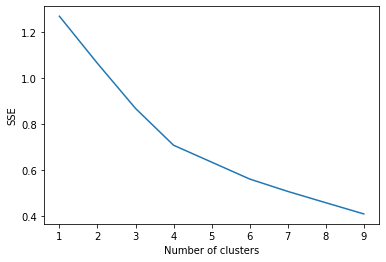

In [28]:
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(brussels_grouped.drop('Communes',axis=1))
    brussels_grouped['Cluster Labels'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()


In [29]:
# set number of clusters
kclusters = 2

brussels_grouped_clustering = brussels_grouped.drop('Communes', 1)


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brussels_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:170]

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0])

In [32]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

brussels_merged = df


# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
brussels_merged = brussels_merged.join(neighbourhoods_venues_sorted.set_index('Communes'), on='Commune')
#brussels_merged.head()
#brussels_merged.dropna(inplace=True)

brussels_merged.head() # check the last columns!

,Postal Code,Commune,Longitude,Latitude,Column1,Column2,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1000,Bruxelles,4.351697,50.846557,NaN,NaN,1,Beer Bar,Bar,Chocolate Shop,Coffee Shop,Hotel,Plaza,Bookstore,Italian Restaurant,Belgian Restaurant,Sandwich Place
1,1020,Laeken,4.348713,50.883392,NaN,NaN,0,Bus Stop,Plaza,Park,Cemetery,Electronics Store,Italian Restaurant,Sandwich Place,Train Station,Tea Room,Deli / Bodega
2,1030,Schaerbeek,4.373712,50.867604,NaN,NaN,0,Plaza,Tram Station,Supermarket,Snack Place,Gastropub,Turkish Restaurant,Music Venue,Bus Line,Restaurant,Coffee Shop
3,1040,Etterbeek,4.389510,50.836851,NaN,NaN,1,Italian Restaurant,Greek Restaurant,Lounge,Plaza,Pizza Place,Bar,French Restaurant,Concert Hall,Diner,Soccer Field
4,1050,Ixelles,4.381571,50.822285,NaN,NaN,1,Bar,Sandwich Place,Vietnamese Restaurant,French Restaurant,Thai Restaurant,Lebanese Restaurant,Burger Joint,Sporting Goods Shop,Chinese Restaurant,Japanese Restaurant


In [34]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brussels_merged['Latitude'], brussels_merged['Longitude'], brussels_merged['Commune'], brussels_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [35]:
brussels_merged.loc[brussels_merged['Cluster Labels'] == 0, brussels_merged.columns[[1] + list(range(5, brussels_merged.shape[1]))]]

,Commune,Column2,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Laeken,NaN,0,Bus Stop,Plaza,Park,Cemetery,Electronics Store,Italian Restaurant,Sandwich Place,Train Station,Tea Room,Deli / Bodega
2,Schaerbeek,NaN,0,Plaza,Tram Station,Supermarket,Snack Place,Gastropub,Turkish Restaurant,Music Venue,Bus Line,Restaurant,Coffee Shop
9,Berchem-Sainte-Agathe,NaN,0,Greek Restaurant,Tram Station,Pharmacy,Burger Joint,Supermarket,French Restaurant,Restaurant,Notary,Bar,Furniture / Home Store
12,Neder-Over-Heembeek,NaN,0,Greek Restaurant,Athletics & Sports,Sports Club,Bus Stop,Dance Studio,Convenience Store,Plaza,Park,Bookstore,Comedy Club
13,Haren,NaN,0,Bus Stop,Train Station,Platform,Plaza,Snack Place,Comedy Club,Trail,Eastern European Restaurant,Farmers Market,Falafel Restaurant
14,Evere,NaN,0,Supermarket,Snack Place,Bakery,Indian Restaurant,Park,Pharmacy,Pool,Chinese Restaurant,Restaurant,Martial Arts School
15,Woluwe-Saint-Pierre,NaN,0,Park,Hockey Field,Sports Club,Trail,Sake Bar,Winery,Electronics Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant
19,Forest,NaN,0,Supermarket,Pharmacy,Park,Snack Place,Factory,Cafeteria,Bistro,Train Station,Men's Store,Gym / Fitness Center


In [36]:
brussels_merged.loc[brussels_merged['Cluster Labels'] == 1, brussels_merged.columns[[1] + list(range(5, brussels_merged.shape[1]))]]

,Commune,Column2,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bruxelles,NaN,1,Beer Bar,Bar,Chocolate Shop,Coffee Shop,Hotel,Plaza,Bookstore,Italian Restaurant,Belgian Restaurant,Sandwich Place
3,Etterbeek,NaN,1,Italian Restaurant,Greek Restaurant,Lounge,Plaza,Pizza Place,Bar,French Restaurant,Concert Hall,Diner,Soccer Field
4,Ixelles,NaN,1,Bar,Sandwich Place,Vietnamese Restaurant,French Restaurant,Thai Restaurant,Lebanese Restaurant,Burger Joint,Sporting Goods Shop,Chinese Restaurant,Japanese Restaurant
5,Saint-Gilles,NaN,1,Bar,Brasserie,Plaza,French Restaurant,Pizza Place,Italian Restaurant,Friterie,Gym / Fitness Center,Farmers Market,Moroccan Restaurant
6,Anderlecht,NaN,1,Greek Restaurant,Plaza,Bar,Middle Eastern Restaurant,Seafood Restaurant,Sandwich Place,Boutique,Restaurant,Belgian Restaurant,Snack Place
7,Molenbeek-Saint-Jean,NaN,1,Supermarket,Metro Station,Asian Restaurant,Tram Station,Fried Chicken Joint,Fruit & Vegetable Store,Spa,Newsstand,Event Service,Fish & Chips Shop
8,Koekelberg,NaN,1,Hostel,Bar,Convenience Store,History Museum,Park,Moving Target,Sandwich Place,Falafel Restaurant,Soccer Field,French Restaurant
10,Ganshoren,NaN,1,Italian Restaurant,Bar,Bakery,Flower Shop,Bus Stop,Sandwich Place,Creperie,Chinese Restaurant,Molecular Gastronomy Restaurant,Church
11,Jette,NaN,1,Bar,Snack Place,Platform,Gastropub,Bus Station,Supermarket,Gym / Fitness Center,Park,Bike Rental / Bike Share,Restaurant
16,Auderghem,NaN,1,French Restaurant,Italian Restaurant,Sushi Restaurant,Middle Eastern Restaurant,Belgian Restaurant,Cocktail Bar,Plaza,Castle,Salad Place,Restaurant


In [ ]:
brussels_merged.loc[brussels_merged['Cluster Labels'] == 2, brussels_merged.columns[[1] + list(range(5, brussels_merged.shape[1]))]]

In [ ]:
brussels_merged.loc[brussels_merged['Cluster Labels'] == 3, brussels_merged.columns[[1] + list(range(5, brussels_merged.shape[1]))]]

In [ ]:
brussels_merged.loc[brussels_merged['Cluster Labels'] == 4, brussels_merged.columns[[1] + list(range(5, brussels_merged.shape[1]))]]